**Env Preparation**

In [1]:
import pandas as pd
import random as rd
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns

#Set Seed
seed = 13

rd.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

**EDA (Exploratory Data Analysis)**

In [2]:
#Load Dataset
dataset_path = "Dataset/fmcg_personalcare/"
marketing_data = pd.read_csv(dataset_path + "marketing.csv")
products_data = pd.read_csv(dataset_path + "products.csv")
reviews_data = pd.read_csv(dataset_path + "reviews.csv")
sales_data = pd.read_csv(dataset_path + "sales.csv")

In [3]:
def data_information(data, name):
    print(name)
    print("=" * 40, '\n')
    print("Data Preview \n")
    print(data.head())
    print("=" * 40, '\n')
    print("Data Info \n")
    print(data.info())
    print("=" * 40, '\n')
    print("Data Description \n")
    print(data.describe())
    print("=" * 40, '\n')
    print("Data Size : ")
    print(data.shape)

In [4]:
data_information(marketing_data, "Marketing Data")

Marketing Data

Data Preview 

  campaign_id product_id     campaign_name  start_date    end_date  \
0      MKT001      PC010  Campaign_1_PC010  2020-10-12  2020-12-14   
1      MKT002      PC008  Campaign_2_PC008  2020-06-30  2020-08-29   
2      MKT003      PC006  Campaign_3_PC006  2021-09-01  2021-09-22   
3      MKT004      PC015  Campaign_4_PC015  2025-04-23  2025-07-04   
4      MKT005      PC003  Campaign_5_PC003  2021-07-15  2021-09-08   

    spend_idr     channel  engagement_rate  
0   256411579          TV            0.566  
1   582461991          TV            0.376  
2   884233026          TV            0.117  
3  1139498941  Influencer            0.560  
4   340924224   Billboard            0.091  

Data Info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   campaign_id      20 non-null     object 
 1   product_id       20 

In [5]:
data_information(products_data, "Product")

Product

Data Preview 

  product_id                           product_name     brand         type  \
0      PC001   Sunsilk Smooth & Shine Shampoo 340ml   Sunsilk      Shampoo   
1      PC002  Sunsilk Black Shine Conditioner 340ml   Sunsilk  Conditioner   
2      PC003       Lifebuoy Total10 Body Wash 400ml  Lifebuoy    Body Wash   
3      PC004      Lifebuoy Mild Care Handwash 200ml  Lifebuoy     Handwash   
4      PC005        Dove Deep Moisture Lotion 200ml      Dove       Lotion   

   size_ml  base_price launch_date  
0      340       32000  2020-02-15  
1      340       33000  2020-06-10  
2      400       28000  2020-03-20  
3      200       25000  2021-05-01  
4      200       35000  2021-11-12  

Data Info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id    15 non-null     object
 1   product_name  15 non-null     object
 2

In [6]:
data_information(reviews_data, "Reviews")

Reviews

Data Preview 

  review_id product_id        date  rating sentiment   platform  \
0   R100000      PC014  2024-10-16     4.6  Positive  Instagram   
1   R100001      PC012  2023-06-27     2.8  Negative  Instagram   
2   R100002      PC003  2022-10-21     3.2   Neutral     Shopee   
3   R100003      PC010  2025-03-07     2.0  Negative  Tokopedia   
4   R100004      PC015  2022-03-03     1.5  Negative     Shopee   

                                        comment  
0   Packaging bocor saat diterima, kurang aman.  
1     Mudah dibeli saat promo, value for money.  
2     Mudah dibeli saat promo, value for money.  
3     Mudah dibeli saat promo, value for money.  
4  Memberikan hasil sesuai klaim after 2 weeks.  

Data Info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   review_id   10000 non-null  object 
 1   product_id  10000 non-nul

In [7]:
data_information(sales_data, "Sales")

Sales

Data Preview 

                         transaction_id        date product_id     region  \
0  fa43024c-7c61-4e2b-bfd1-84915e86c4f7  2024-02-04      PC001   Semarang   
1  cc02b941-61b7-4e37-b385-ecfc2fe2a0b0  2022-05-31      PC004      Medan   
2  378b66ac-8b18-43e3-8b91-cfbb0ee1d346  2020-10-24      PC013  Palembang   
3  42ff9d7e-aba8-4444-b144-3ed288c3ae2c  2023-05-31      PC001      Medan   
4  605dfc68-c347-406e-b6af-2bb43cabc515  2024-05-06      PC009      Medan   

     channel  units_sold  avg_price  discount_pct    revenue  \
0     Shopee           4   31721.61             5  126886.45   
1  Tokopedia           4   23148.20             0   92592.80   
2   Alfamart           5   25396.69            20  126983.43   
3  Tokopedia           7   30006.83             0  210047.84   
4  Tokopedia           2   30927.25             5   61854.50   

   days_since_launch  
0               1450  
1                395  
2              -1178  
3               1201  
4              

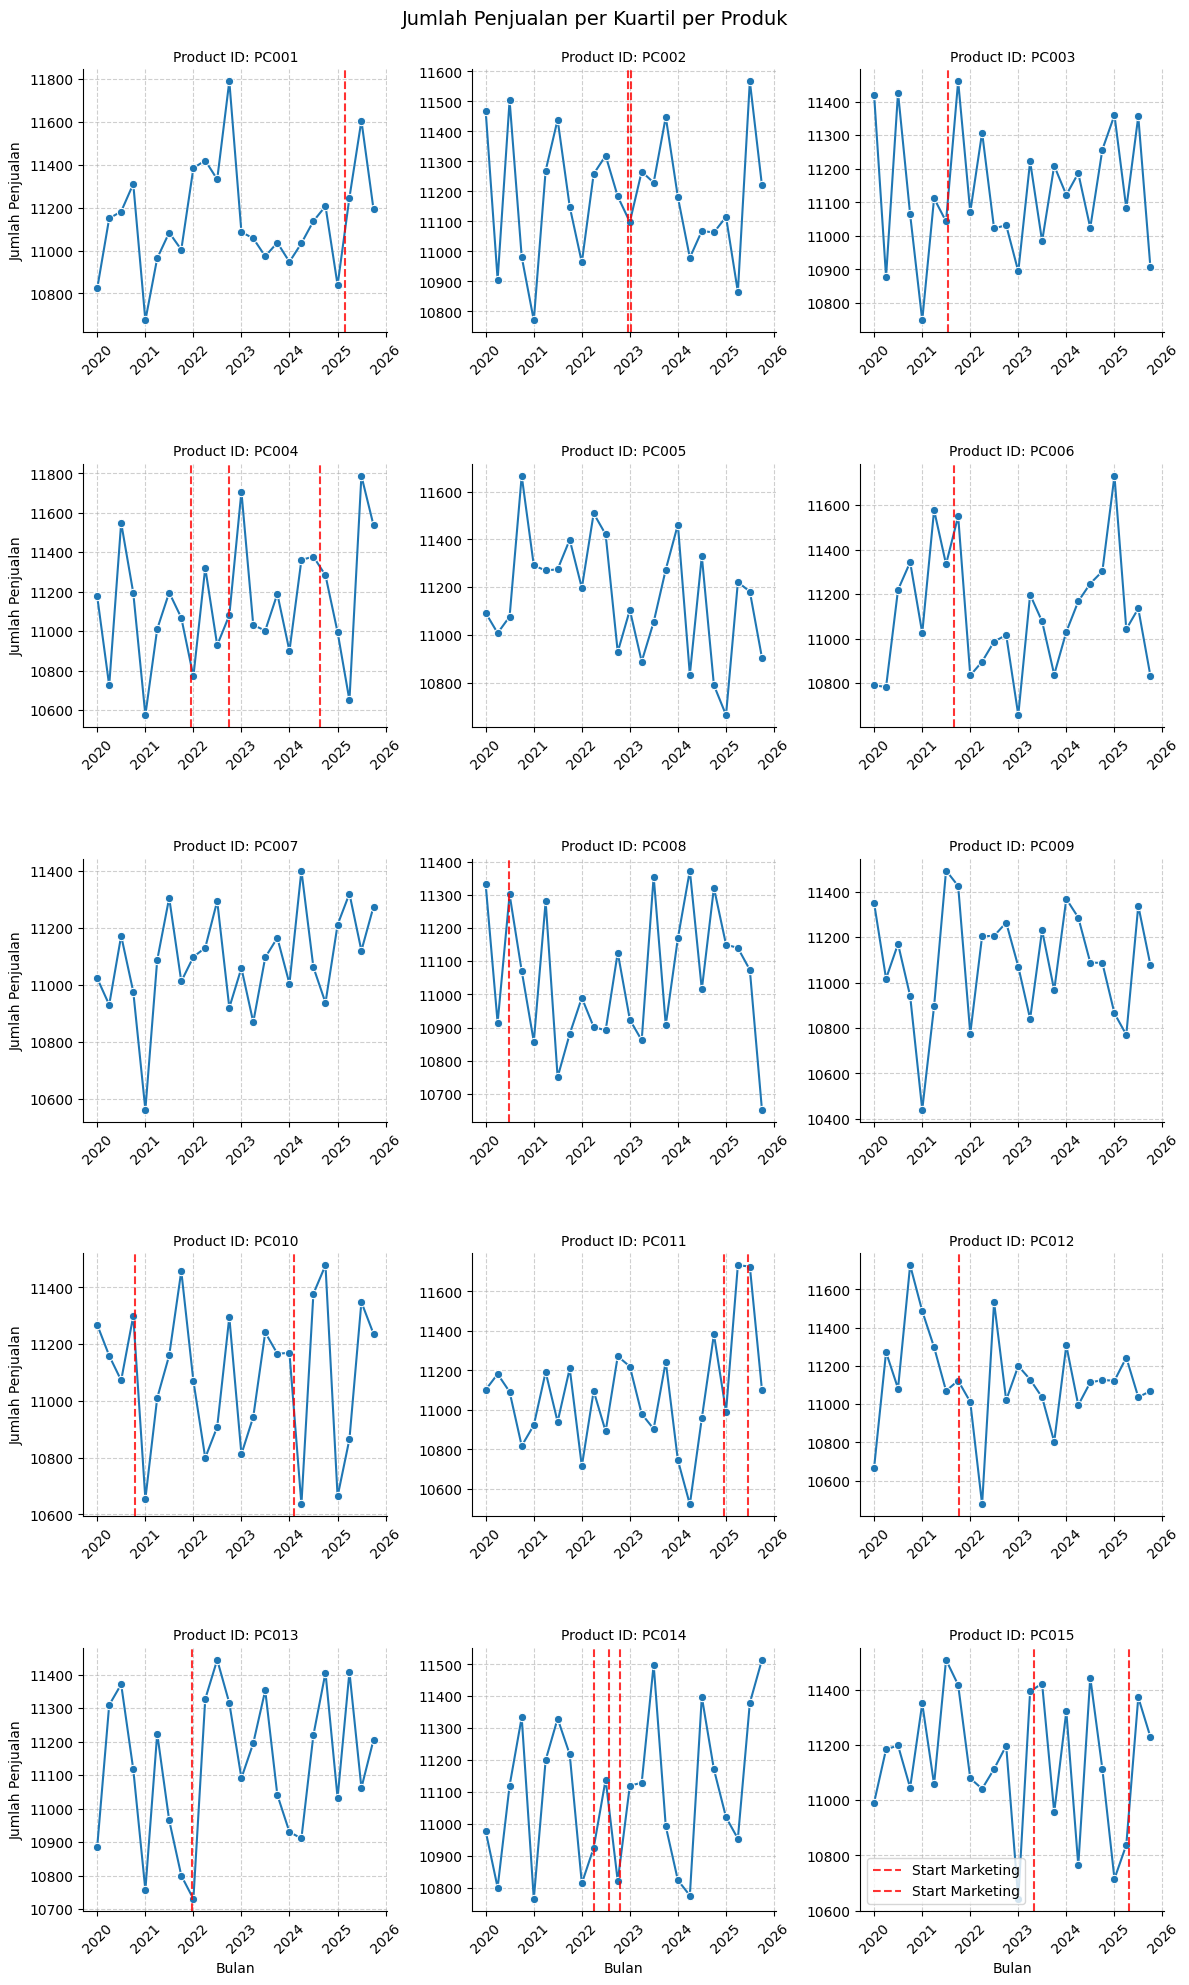

In [17]:
import matplotlib.dates as mdates

# konversi tanggal ke tipe datetime
sales_data['date'] = pd.to_datetime(sales_data['date'])
sales_data['month'] = sales_data['date'].dt.to_period('Q')
sales_data['year'] = sales_data['date'].dt.to_period('Y')

# agregasi per bulan per produk
sales_sum = sales_data.groupby(['product_id','month'])['units_sold'].sum().reset_index()
sales_sum['month'] = sales_sum['month'].dt.to_timestamp()

sales_sum_year = sales_data.groupby(['product_id','year'])['units_sold'].sum().reset_index()
sales_sum_year['year'] = sales_sum_year['year'].dt.to_timestamp()

campaign_date = marketing_data.groupby(['product_id'])['start_date'].unique()

# buat grid plot per product_id
g = sns.FacetGrid(sales_sum, col='product_id', col_wrap=3, height=4, sharey=False, sharex=False)
g.map_dataframe(sns.lineplot, x='month', y='units_sold', marker='o')

# atur tampilan judul dan label sumbu
g.set_titles(col_template="Product ID: {col_name}")
g.set_axis_labels("Bulan", "Jumlah Penjualan")

# tambahkan grid ke setiap subplot
for ax, product in zip(g.axes.flatten(), g.col_names):
    # pastikan pengecekan membership pada index series
    if product in campaign_date.index:
        # ambil semua tanggal campaign untuk product ini (bisa lebih dari satu)
        dates = pd.to_datetime(campaign_date.loc[product])
        # gambar satu axvline untuk setiap tanggal campaign
        for tanggal in dates:
            ax.axvline(tanggal, color='red', linestyle='--', linewidth=1.5, alpha=0.8, label='Start Marketing')
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.tick_params(axis='x', rotation=45)

# tambahkan judul utama
plt.subplots_adjust(top=0.95, hspace=0.5,)
g.fig.suptitle("Jumlah Penjualan per Kuartil per Produk", fontsize=14)

plt.legend()
plt.show()


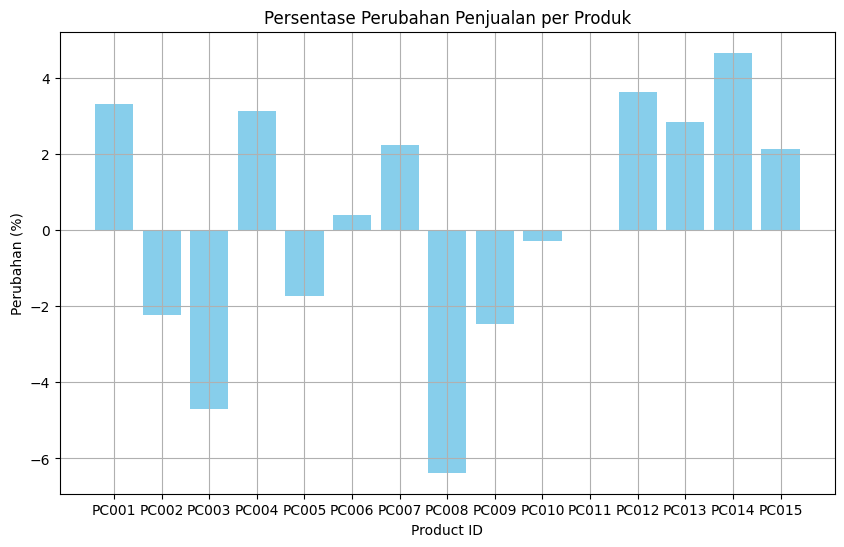

In [23]:
from datetime import datetime

product_sold_percentage = []


df_percentage = sales_sum[
    (sales_sum['month'] == datetime(2020, 1, 1)) |
    (sales_sum['month'] == datetime(2025, 10, 1))
].reset_index(drop=True)

product_id = np.unique(df_percentage['product_id'])

for i in range(1 , len(df_percentage), 2):
    tmp = ((df_percentage['units_sold'].iloc[i] - df_percentage['units_sold'].iloc[i-1]) / df_percentage['units_sold'].iloc[i]) * 100
    product_sold_percentage.append(tmp)

plt.figure(figsize=(10, 6))
plt.bar(product_id, product_sold_percentage, color='skyblue')
plt.grid(True)
plt.xlabel("Product ID")
plt.ylabel("Perubahan (%)")
plt.title("Persentase Perubahan Penjualan per Produk")
plt.show()

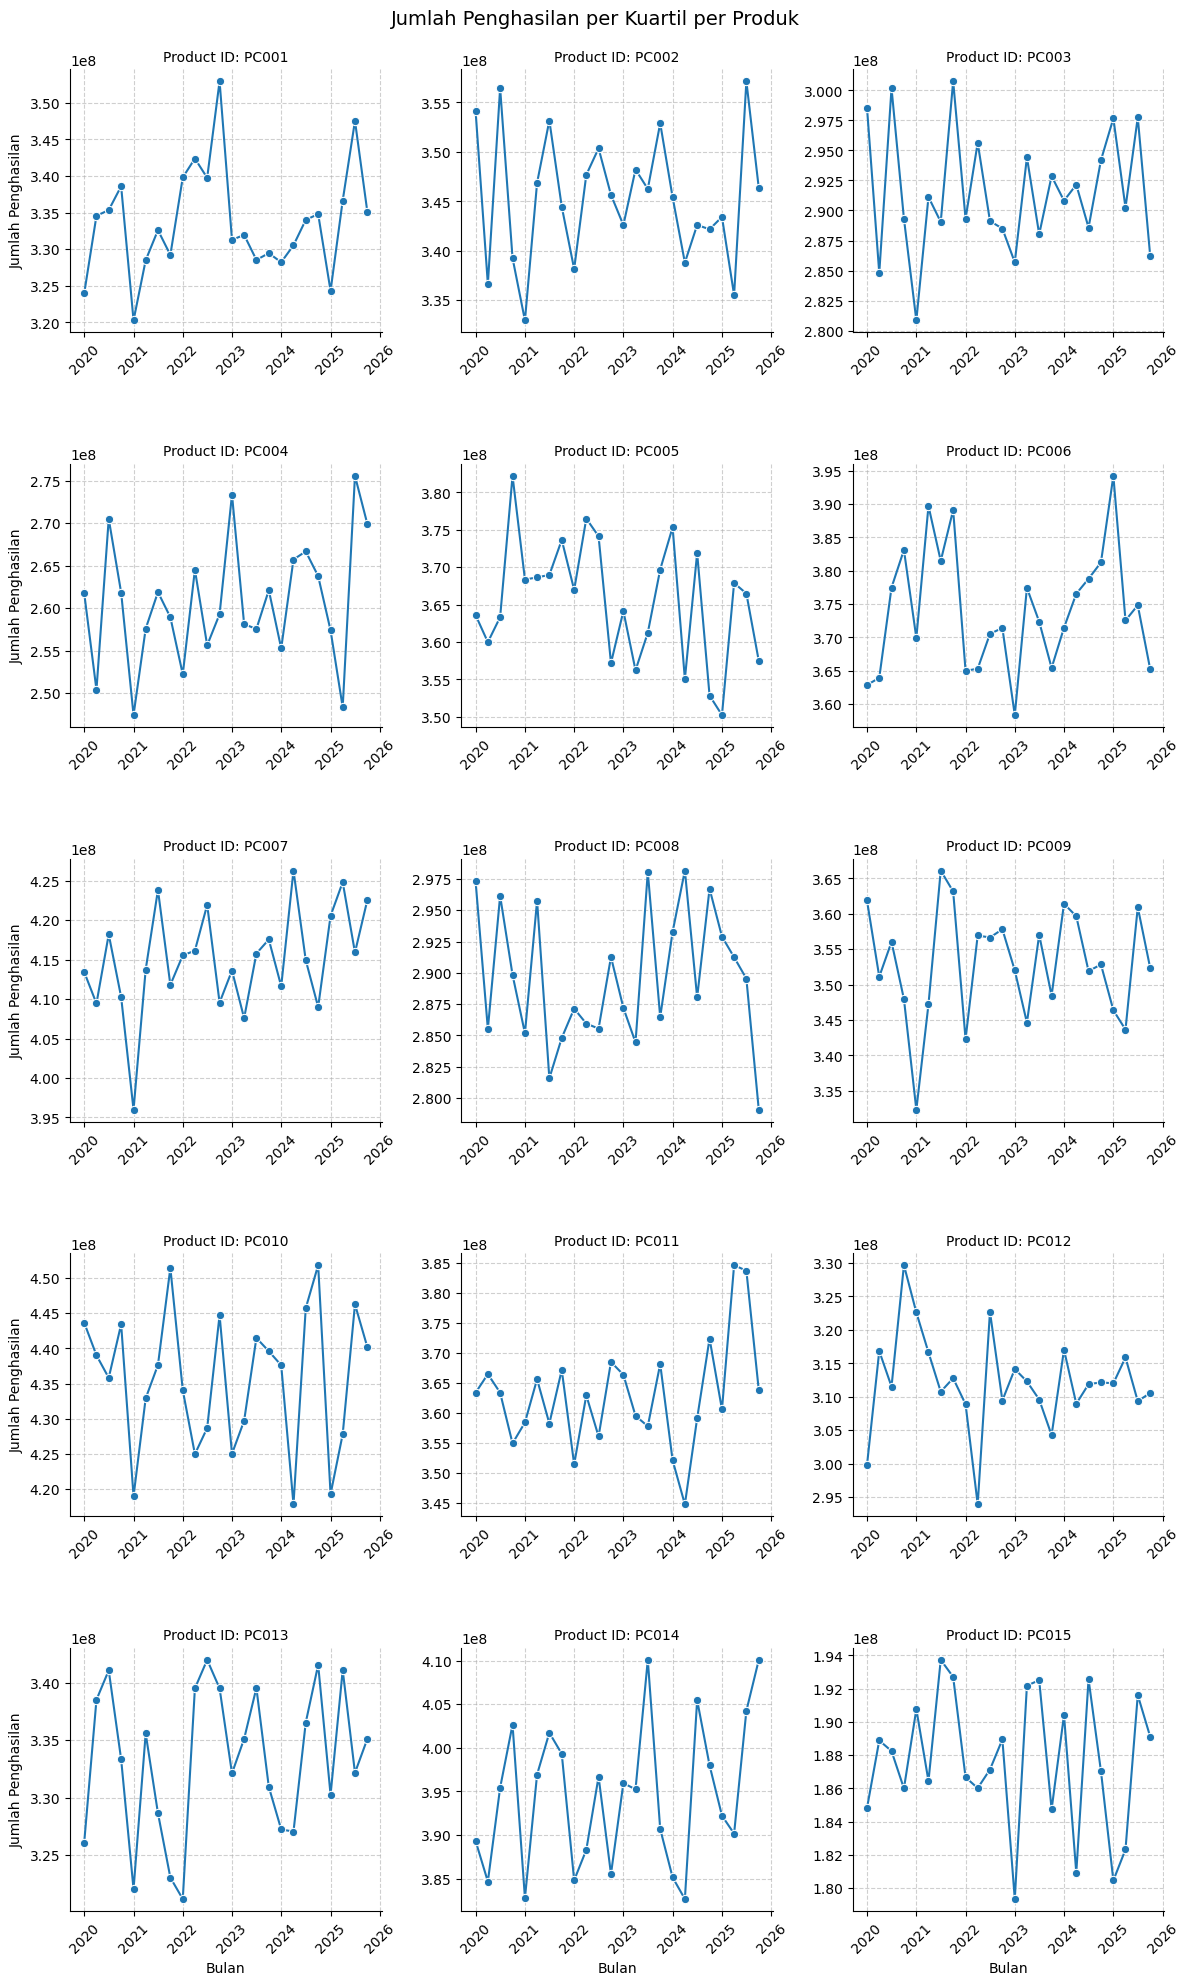

In [11]:
import matplotlib.dates as mdates

# konversi tanggal ke tipe datetime
sales_data['date'] = pd.to_datetime(sales_data['date'])
sales_data['month'] = sales_data['date'].dt.to_period('Q')

# agregasi per bulan per produk
sales_sum = sales_data.groupby(['product_id','month'])['revenue'].sum().reset_index()
sales_sum['month'] = sales_sum['month'].dt.to_timestamp()

# buat grid plot per product_id
g = sns.FacetGrid(sales_sum, col='product_id', col_wrap=3, height=4, sharey=False, sharex=False)
g.map_dataframe(sns.lineplot, x='month', y='revenue', marker='o')

# atur tampilan judul dan label sumbu
g.set_titles(col_template="Product ID: {col_name}")
g.set_axis_labels("Bulan", "Jumlah Penghasilan")

# tambahkan grid ke setiap subplot
for ax in g.axes.flatten():
    ax.grid(True, linestyle='--', alpha=0.6)
    # tampilkan label sumbu x dengan rotasi agar terbaca
    ax.tick_params(axis='x', rotation=45)

# tambahkan judul utama
plt.subplots_adjust(top=0.95, hspace=0.5,)
g.fig.suptitle("Jumlah Penghasilan per Kuartil per Produk", fontsize=14)

plt.show()


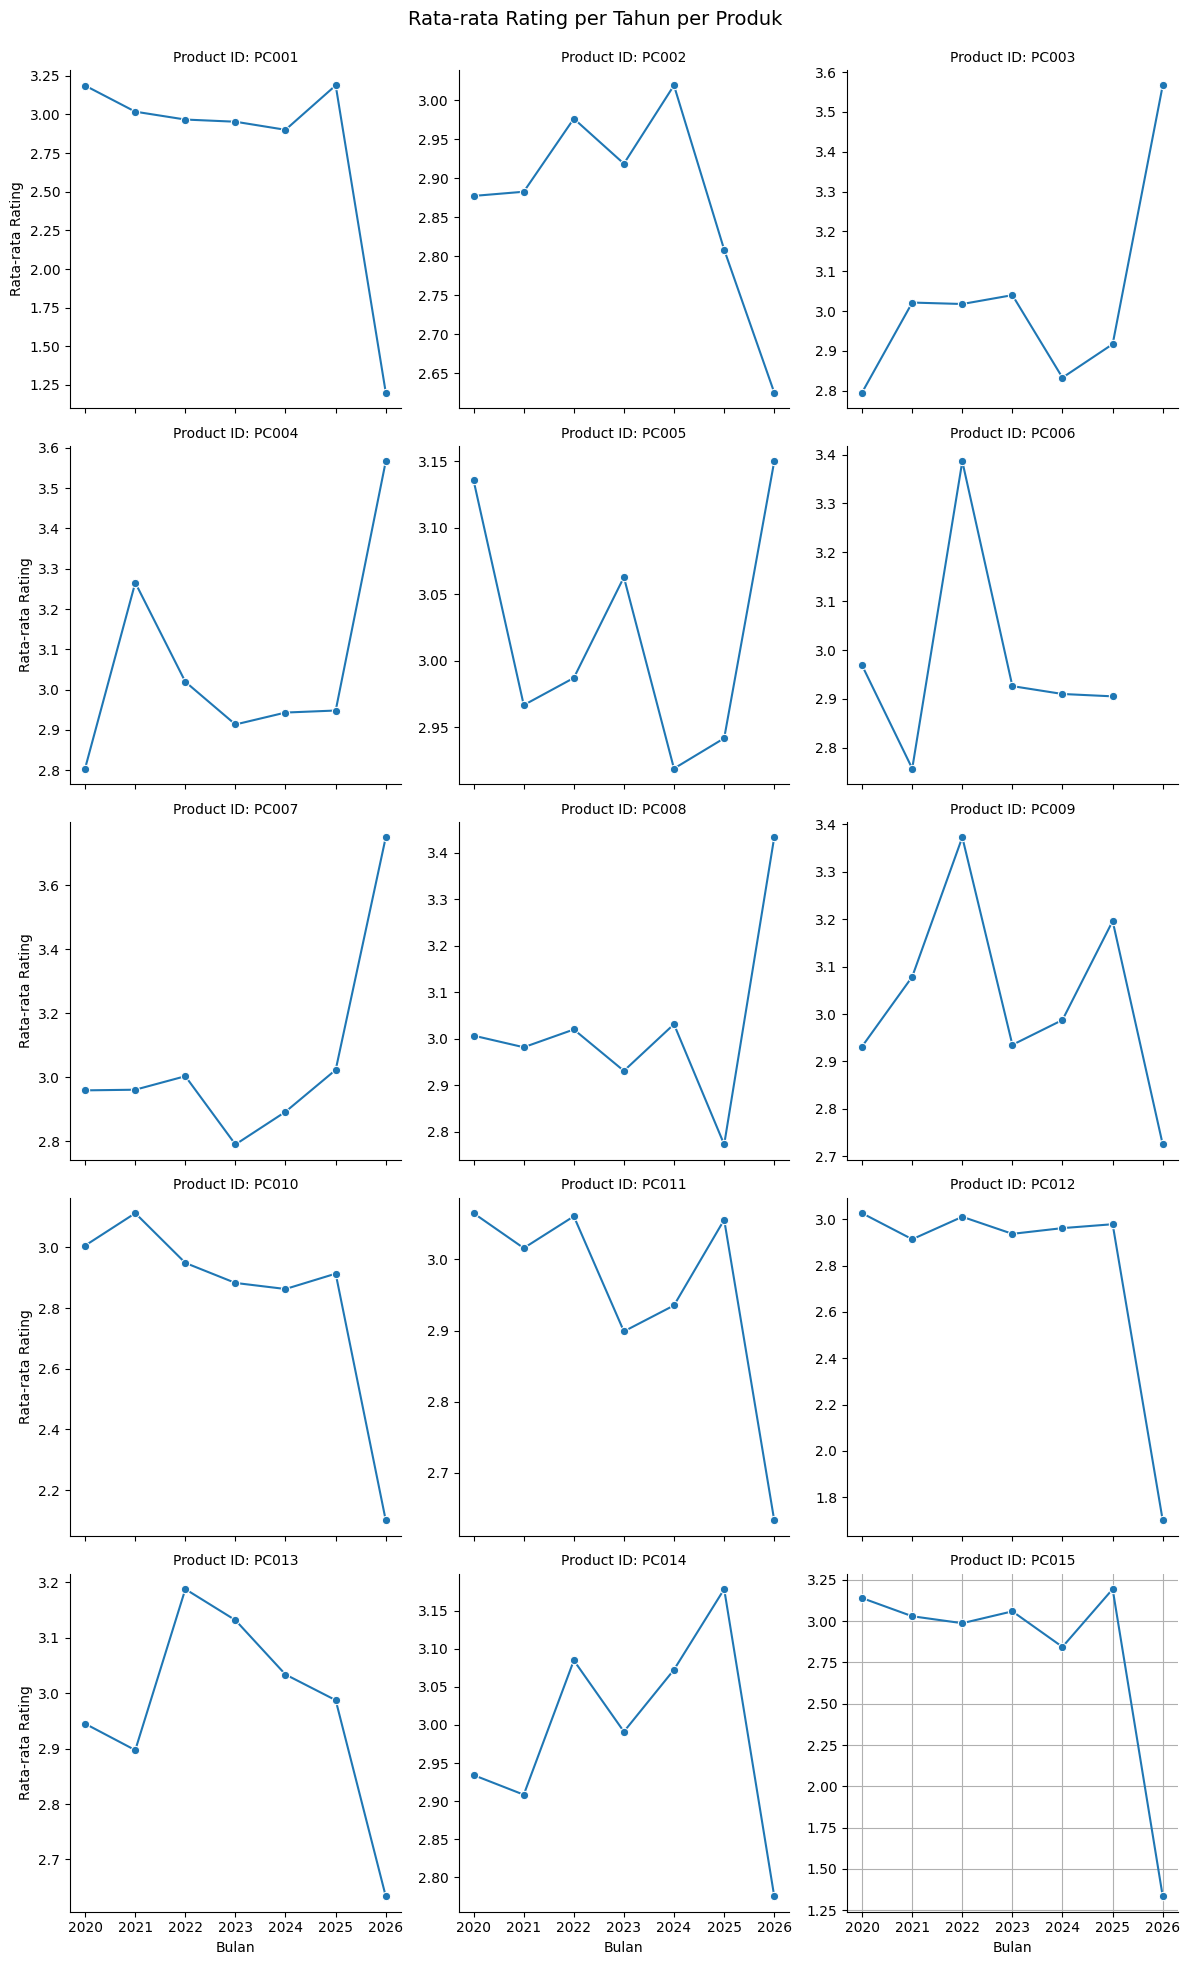

In [10]:
# pastikan kolom tanggal benar
reviews_data['date'] = pd.to_datetime(reviews_data['date'])
reviews_data['month'] = reviews_data['date'].dt.to_period('Y')

# hitung rata-rata per produk per bulan
monthly_avg = reviews_data.groupby(['product_id', 'month'])['rating'].mean().reset_index()
monthly_avg['month'] = monthly_avg['month'].dt.to_timestamp()

# buat grid plot per product_id
g = sns.FacetGrid(monthly_avg, col='product_id', col_wrap=3, height=4, sharey=False)
g.map_dataframe(sns.lineplot, x='month', y='rating', marker='o')

# atur tampilan
g.set_titles(col_template="Product ID: {col_name}")
g.set_axis_labels("Bulan", "Rata-rata Rating")
plt.subplots_adjust(top=0.95)
g.fig.suptitle("Rata-rata Rating per Tahun per Produk", fontsize=14)
plt.grid(True)
plt.show()